In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sample_student_feedback.csv to sample_student_feedback (1).csv


In [ ]:
df = pd.read_csv("sample_student_feedback.csv")
df.head()


,Subject_Knowledge,Concept_Clarity,Presentation_Use,Assignment_Difficulty,Doubt_Solving,Course_Structure,Student_Support,Recommendation_Relevance
0,5,4,5,3,5,4,5,5
1,4,4,4,4,4,4,4,4
2,3,4,3,3,3,4,3,3
3,5,5,5,4,5,5,5,5
4,4,4,4,3,4,4,4,4


In [ ]:
df.columns


Index(['Subject_Knowledge', 'Concept_Clarity', 'Presentation_Use',
       'Assignment_Difficulty', 'Doubt_Solving', 'Course_Structure',
       'Student_Support', 'Recommendation_Relevance'],
      dtype='object')

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')


In [ ]:
print(df.columns.tolist())


['Subject_Knowledge', 'Concept_Clarity', 'Presentation_Use', 'Assignment_Difficulty', 'Doubt_Solving', 'Course_Structure', 'Student_Support', 'Recommendation_Relevance', 'Overall_Satisfaction']


In [ ]:
df[['Overall_Satisfaction']].head()


,Overall_Satisfaction
0,4.500
1,4.000
2,3.250
3,4.875
4,3.875


In [ ]:
df['Student_ID'] = range(1, len(df) + 1)
df[['Student_ID', 'Overall_Satisfaction']].head()


,Student_ID,Overall_Satisfaction
0,1,4.500
1,2,4.000
2,3,3.250
3,4,4.875
4,5,3.875


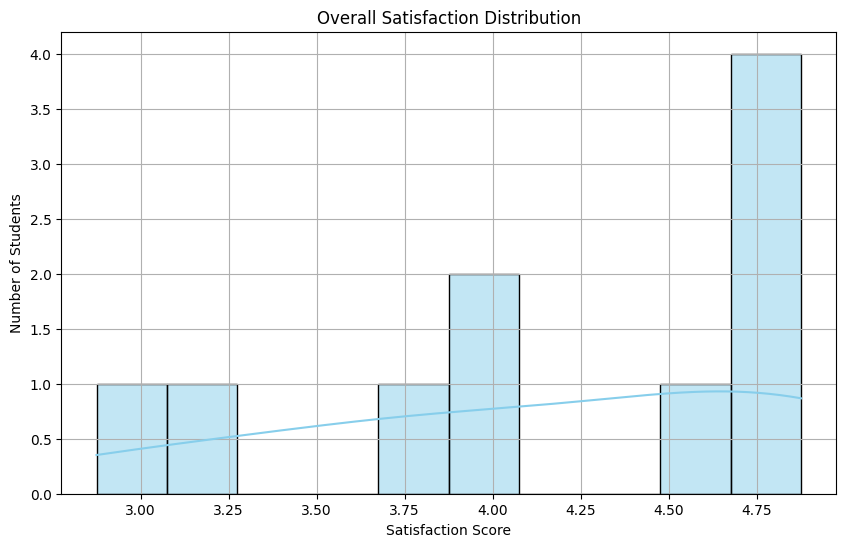

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Overall_Satisfaction'], kde=True, bins=10, color='skyblue')
plt.title('Overall Satisfaction Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


/tmp/ipython-input-2187611185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='viridis')


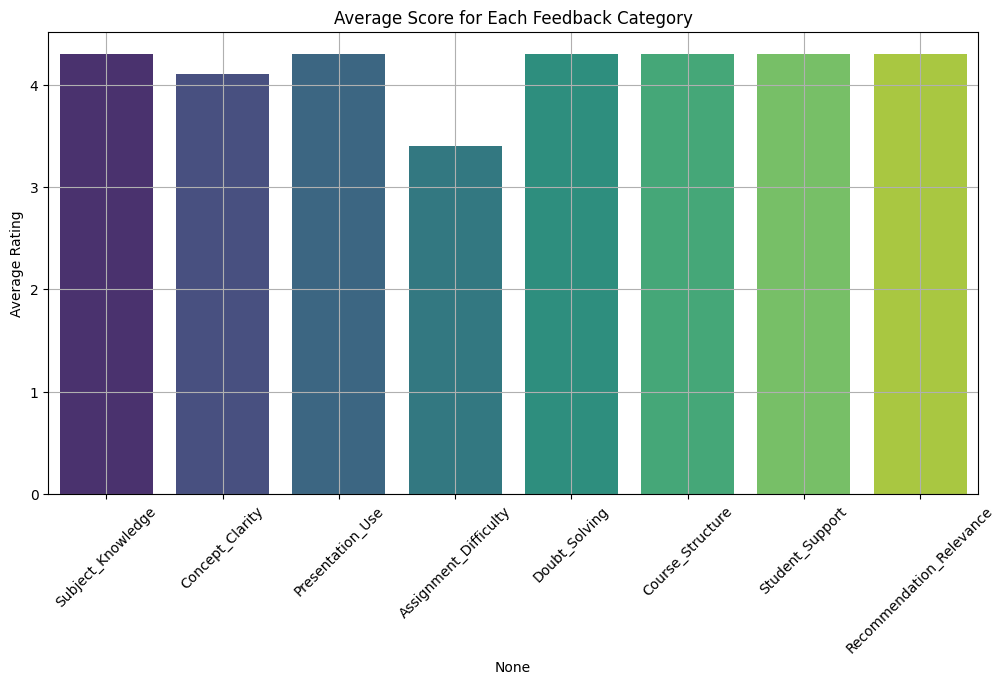

In [ ]:
plt.figure(figsize=(12,6))
avg_scores = df.drop(columns=['Student_ID', 'Overall_Satisfaction']).mean()
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='viridis')
plt.title('Average Score for Each Feedback Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


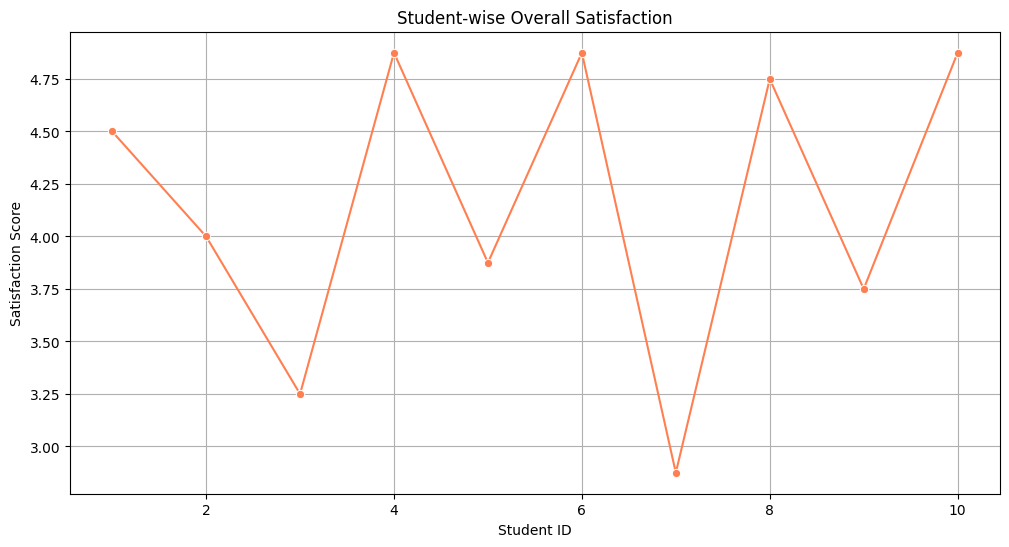

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Student_ID', y='Overall_Satisfaction', data=df, marker='o', color='coral')
plt.title('Student-wise Overall Satisfaction')
plt.xlabel('Student ID')
plt.ylabel('Satisfaction Score')
plt.grid(True)
plt.show()


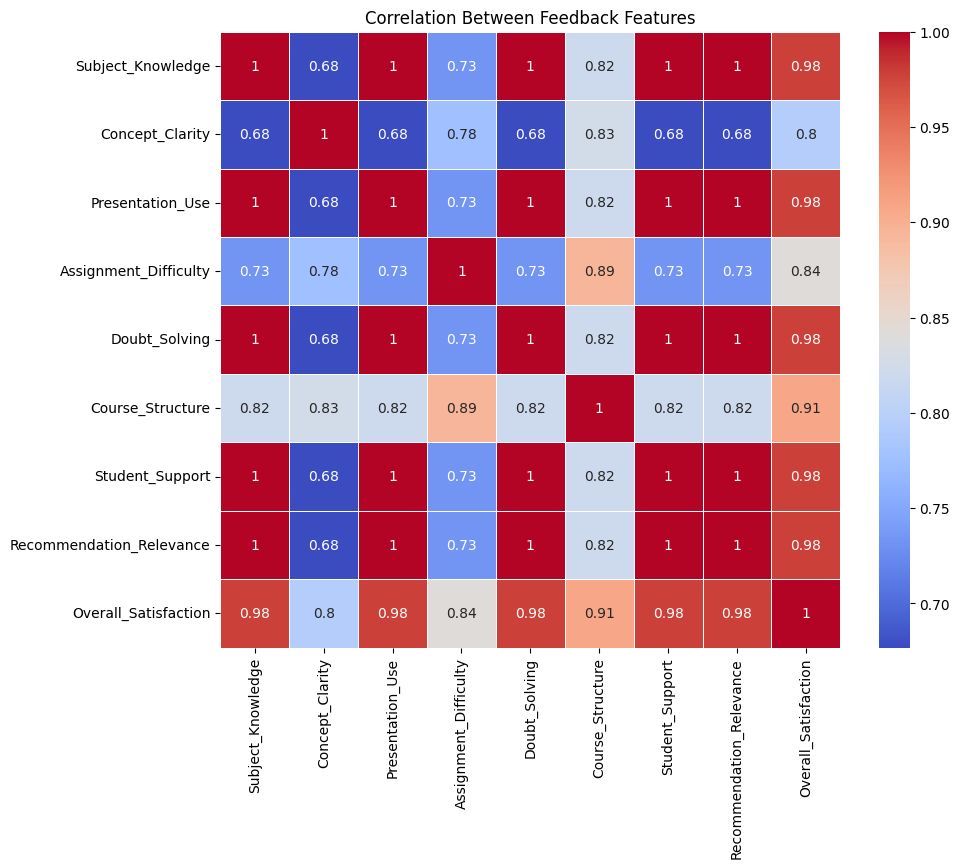

In [ ]:
plt.figure(figsize=(10,8))
corr = df.drop(columns=['Student_ID']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Feedback Features')
plt.show()


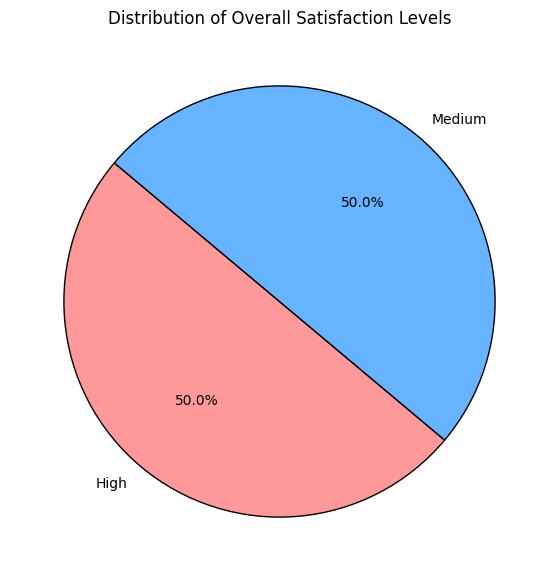

In [ ]:
# Categorize Overall Satisfaction into 3 groups
def satisfaction_level(score):
    if score <= 2:
        return 'Low'
    elif score <= 4:
        return 'Medium'
    else:
        return 'High'

df['Satisfaction_Level'] = df['Overall_Satisfaction'].apply(satisfaction_level)

# Plot Pie Chart
plt.figure(figsize=(7,7))
df['Satisfaction_Level'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99'],
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Overall Satisfaction Levels')
plt.ylabel('')
plt.show()


In [ ]:
df.to_csv("student_feedback_final.csv", index=False)


In [ ]:
plt.savefig("chart_name.png")


<Figure size 640x480 with 0 Axes>

In [ ]:
import shutil
shutil.make_archive('all_feedback_files', 'zip', '.')

from google.colab import files
files.download("all_feedback_files.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')